In [1]:
import numpy as np
import pandas as pd

field_vectors = np.load('../assets/field_en_fasttext.pkl', allow_pickle=True)

In [2]:
list(field_vectors.keys())[:9]

['Polymer science',
 'Animal science',
 'Mathematical analysis',
 'Control engineering',
 'Control theory',
 'Astronomy',
 'Computer vision',
 'Medicinal chemistry',
 'Composite material']

In [3]:
from sklearn.manifold import TSNE
import time

time_start = time.time()

labels = list(field_vectors.keys())
vectors = list(field_vectors.values())
tsne_coords = TSNE(random_state=20211205).fit_transform(vectors)

/home/james/miniconda3/envs/field-of-study-pipelines/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/james/miniconda3/envs/field-of-study-pipelines/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [4]:
tsne_df = pd.DataFrame(tsne_coords)
tsne_df['field'] = labels
tsne_df.rename(columns={0: 'x', 1: 'y'}, inplace=True)

/home/james/miniconda3/envs/field-of-study-pipelines/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


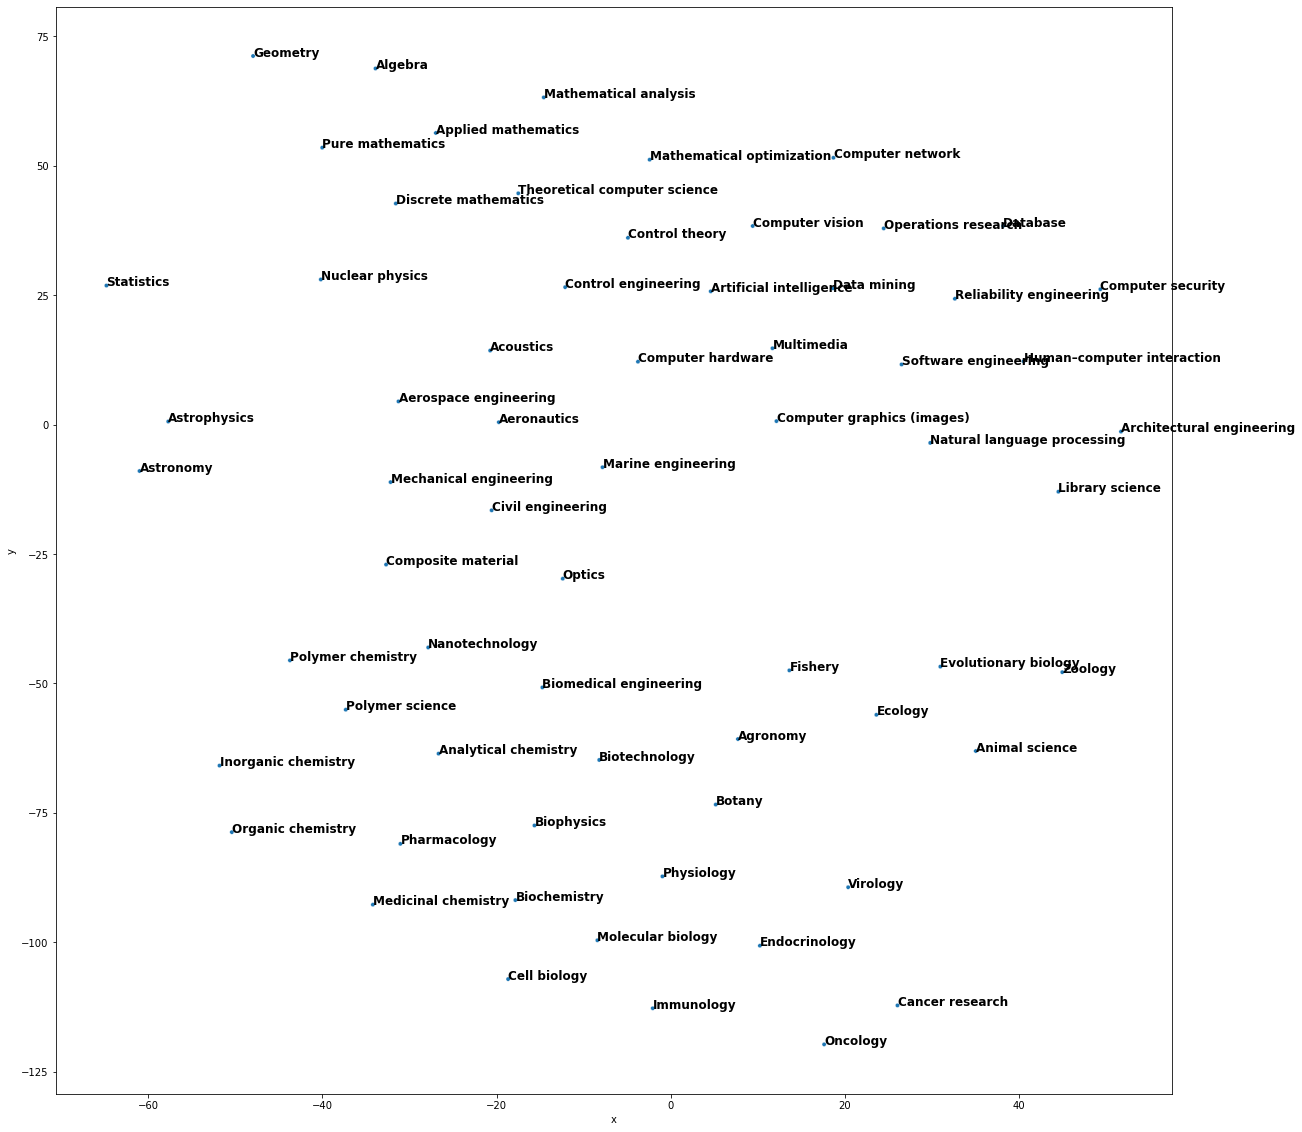

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
p1 = sns.scatterplot('x',
                     'y',
                     data=tsne_df,
                     size=12,
                     legend=False)

for line in range(0, tsne_df.shape[0]):
    p1.text(tsne_df.x[line] + 0.01,
            tsne_df.y[line],
            tsne_df.field[line],
            horizontalalignment='left',
            size='large',
            color='black',
            weight='semibold')

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(list(field_vectors.values()))

In [7]:
len(field_vectors)

65

In [8]:
similarity.min(), similarity.max()

(0.8570686, 1.0000005)